In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

In [32]:
df = pd.read_csv('Pokemon.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
df=df.drop(['#','generation','legendary'],axis=1)
df.name = df.name.str.replace(".*(?=Mega)", "")
df['type_2'].fillna(df['type_1'], inplace=True)

In [33]:
df.head(10)

,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,Fire,309,39,52,43,60,50,65
5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80
6,Charizard,Fire,Flying,534,78,84,78,109,85,100
7,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
8,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100
9,Squirtle,Water,Water,314,44,48,65,50,64,43


## 1. Choose one variable and plot that variable four different ways.

## Boxplot

Text(0.5,0.98,'Boxplot: Total Power')

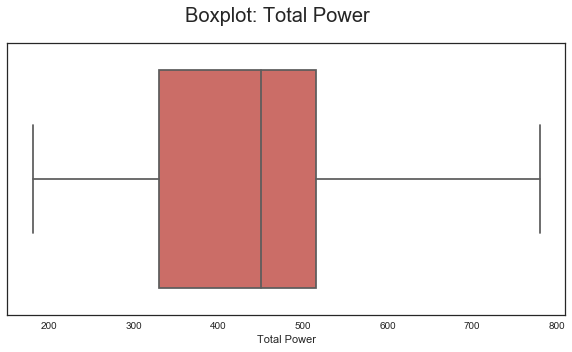

In [53]:
f, ax = plt.subplots(figsize=(10,5))
sns.set(style="darkgrid", palette="hls")
ax = sns.boxplot(x='total', data=df, palette = 'hls')
plt.xlabel("Total Power")
plt.suptitle("Boxplot: Total Power", fontsize=20)

A boxplot displays several important features of  a distribution, the minimum, medium and maximum as wsell as the first and third quartiles. It is useful for quickly indicating whether the deistributions are skewed or whether there are any outliers. However, it does not show the distribution in as much detail as other plots, for example a Histogram.

## KDE/Histogram

In [49]:
df = pd.read_csv('Pokemon.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
df=df.drop(['#','generation','legendary'],axis=1)
df.name = df.name.str.replace(".*(?=Mega)", "")
df['type_2'].fillna(df['type_1'], inplace=True)

In [50]:
df_total = pd.DataFrame(df['total'])
df_total.total.describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: total, dtype: float64

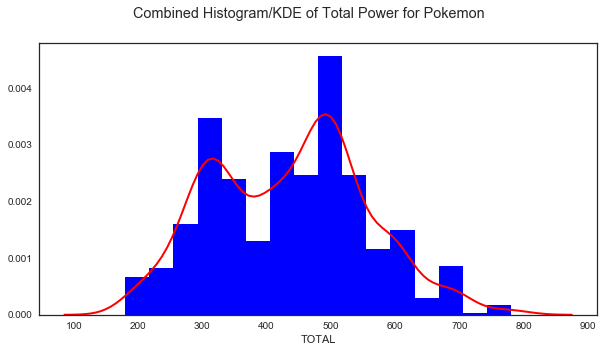

In [52]:
f, ax = plt.subplots(figsize=(10,5))
sns.set(style="white", palette="muted")
sns.distplot(df_total, rug=False,
             kde_kws={"color": "r", "lw": 2},
             hist_kws={ "alpha":1,"lw": 2, "color": "b"})
ax.set(xlabel="TOTAL")
plt.suptitle('Combined Histogram/KDE of Total Power for Pokemon')
rcParams['axes.titlepad'] = 10
plt.show()

Combing a KDE plot with a histogram is a useful plot to identity distribution of data. Here, we get a better sense of how many Pokemon fall at each Total Power interval. Values occuring with high frequency are easier to identify in a histogram than in a box plot. However, with the histogram the center and spread are harder to identify, and exact values cannot be read due to the grouping of the data.

## Swarmplot

In [7]:
df.head()

,name,type_1,type_2,stat,value
0,Bulbasaur,Grass,Poison,total,318
1,Ivysaur,Grass,Poison,total,405
2,Venusaur,Grass,Poison,total,525
3,Mega Venusaur,Grass,Poison,total,625
4,Charmander,Fire,Fire,total,309


Text(0.5,0.98,'Swarmplot: Total Power')

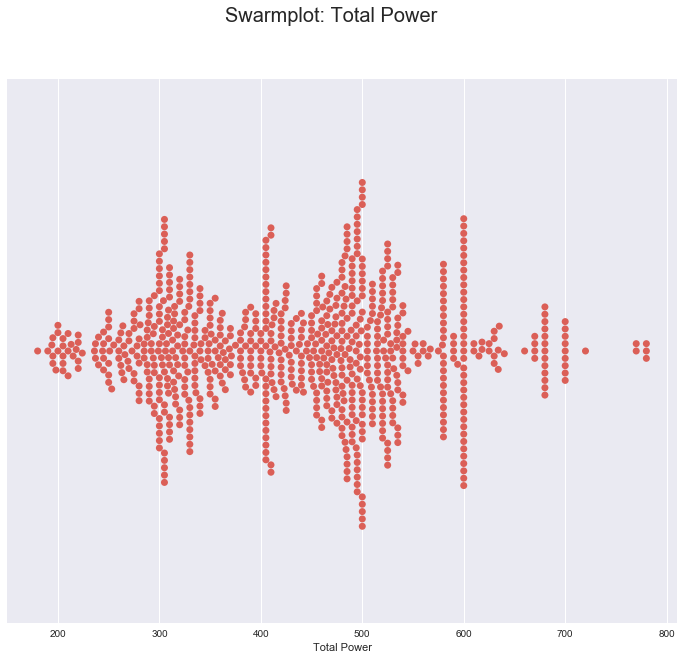

In [54]:
f, ax = plt.subplots(figsize=(12,10))
sns.set(style="darkgrid", palette="hls")
sns.swarmplot(x = 'total', data=df, dodge=True, size = 7)
plt.xlabel("Total Power")
plt.suptitle("Swarmplot: Total Power", fontsize=20)

The swarmplot gives a better representation of the distribution of values. Swarmplot's do not need a frequncy axis and offer a visual means of comparison. As we can see in the above plot, it does not scale very well to large numbers of observations.

## Violin Plot

Text(0.5,0.98,'Violin Plot: Total Power')

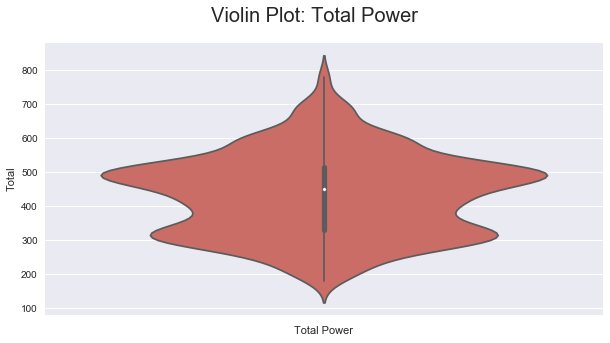

In [55]:
f, ax = plt.subplots(figsize=(10,5))
sns.set(style="white", palette='hls')
sns.violinplot(y=df_total.total, data=df_total)
ax.set(ylabel = "Total")
plt.xlabel("Total Power")
plt.suptitle("Violin Plot: Total Power", fontsize=20)

With the violin plot, we can quickly asses the distribution of Total Power. It shows multimodal data as well as normailty/skewness unambiguously. On the opposite side, violinplots are not too common and may not be recognized by some audiences.

## 2. Choose two continuous variables, and plot them three different ways.

I will choose Attack and Defense a my two continuous variables.

## Scatterplot

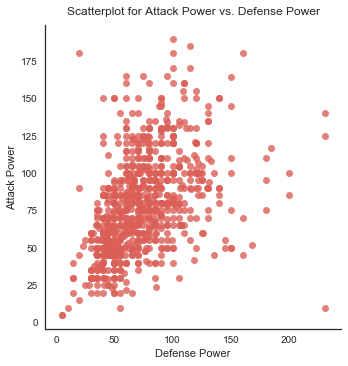

In [77]:
sns.set(style = "white", palette = "hls")
plt.rcParams["figure.figsize"] = (10,10)
ax = sns.lmplot(x = 'defense', y = 'attack', data=df, fit_reg=False)
plt.xlabel("Defense Power")
plt.ylabel("Attack Power")
plt.title("Scatterplot for Attack Power vs. Defense Power")
rcParams['axes.titlepad']=10
plt.show()

Scatter plots are useful when looking at the relationship between two variables, in this case Attack and Defense. Conversely, it is hard to make concrete observations from this plot as the majority of the data points are closely clumped together. An excess of observations may not be entirely beneficial in this analysis.

## KDE

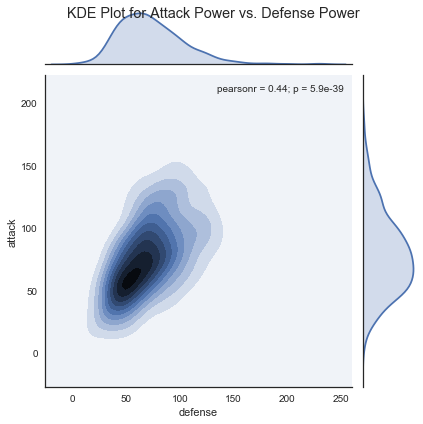

In [58]:
sns.set(style="white")
plt.rcParams["figure.figsize"] = (12,8)
ax = sns.jointplot(x = 'defense', y= 'attack', data= df, kind = 'kde')
plt.suptitle("KDE Plot for Attack Power vs. Defense Power")
plt.show()

KDE plots are good for estimating a continuous distribtuion. KDE's make it easier to identify a focused center of the continuous variables and in showing overlap. However, this plot does not do a great job of identifying outliers in its visualization.

## Hexabin Plot

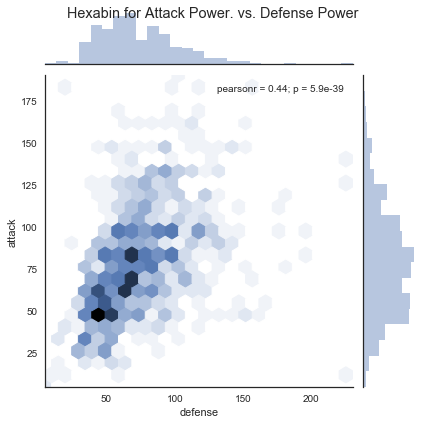

In [59]:
sns.set(style="white")
plt.rcParams["figure.figsize"] = (10,10)
ax = sns.jointplot(x = 'defense', y= 'attack', data=df, kind = 'hex')
plt.suptitle("Hexabin for Attack Power. vs. Defense Power")
plt.show()

The Hexabin plot is helpful in showing counts of observations especially in cases when there are a large number of them. The color variation is helpful in pinpointing areas of attack and defense. Conversely, this may be a confusing plot for someone who is unfamiliar with it's type.

## 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

I will look at Pokemon Type (Type 1) as my categorical variable, and HP Power as my continuous variable. I will look at top 5 Pokemon type.

In [60]:
df.type_1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64

In [61]:
df2 = df[(df['type_1'] == 'Water') | (df['type_1'] == 'Normal') | (df['type_1'] == 'Grass') | 
         (df['type_1'] == 'Bug') | (df['type_1'] == 'Psychic')]

## Barplot

Text(0.5,1,'Barplot: HP Power by Type')

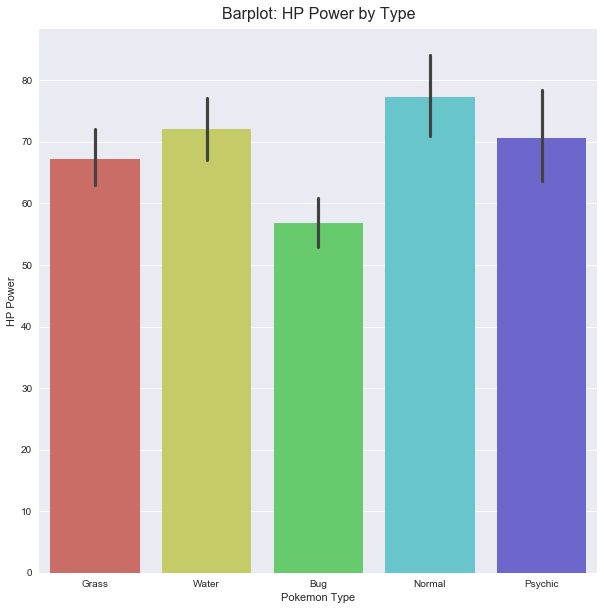

In [78]:
sns.set(style="darkgrid", palette="hls")
sns.barplot(x="type_1", y="hp", data=df2)
plt.xlabel("Pokemon Type")
plt.ylabel("HP Power")
plt.title('Barplot: HP Power by Type', fontsize=16)

Bar plots are useful in represeting estimate of central tendency for continuous variables and provides error bars to as indicators of any uncertainty. Here, the bar plot is helpful for visualizing the mean HP power of the top Pokemon types. It is helpful knowing that when the difference between the two means is statistically significant, the error bars do not overlap. However, if they do overlap, there is no statstical significance as the sample sizes are equal.

## Swarmplot

Text(0.5,1,'Swarmplot: HP Power by Type')

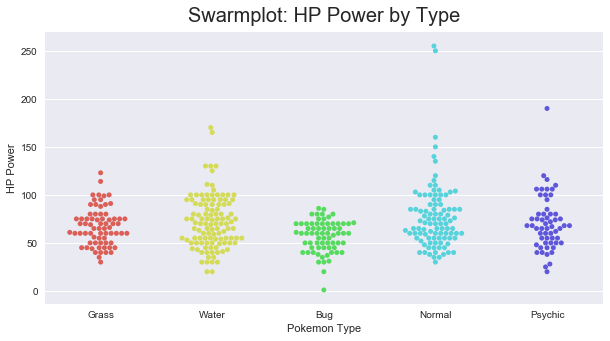

In [63]:
sns.set(style = "darkgrid", palette = "hls")
f, ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.swarmplot(x= "type_1", y = "hp", data=df2, dodge = True)
plt.xlabel("Pokemon Type")
plt.ylabel("HP Power")
plt.title('Swarmplot: HP Power by Type', fontsize=20)

Swarm plots are helpful in visualizing the distribution of data, and identifies where type and hp tend to cluster. However, swarm plots are not useful in showing and identifying the median hp of each pokemon type.

## Violin and Swarmplot

Text(0.5,1,'Violin & Swarmplot: HP Power by Type')

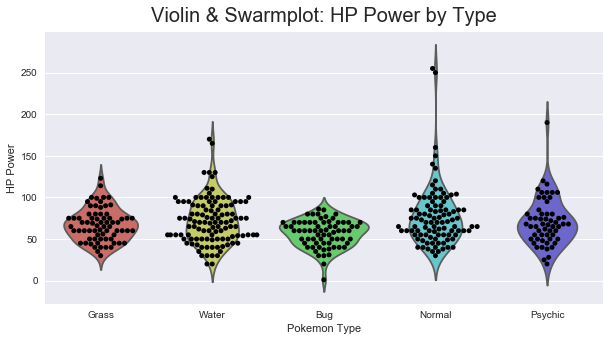

In [64]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style = "whitegrid", palette = "hls")
ax = sns.violinplot(x="type_1", y = "hp", data=df2, inner=None)
ax = sns.swarmplot(x="type_1", y = "hp", data=df2, color="black", edgecolor="gray")
plt.xlabel("Pokemon Type")
plt.ylabel("HP Power")
plt.title('Violin & Swarmplot: HP Power by Type', fontsize=20)

Drawing a swarmplot on top of a violin plot is helpful in visualizing your observation. On the other hand, too many visuals can become distracting when trying to present this data, so be very careful when selecting color schemes.

## Pointplot

Text(0.5,1,'Pointplot: HP Power by Type')

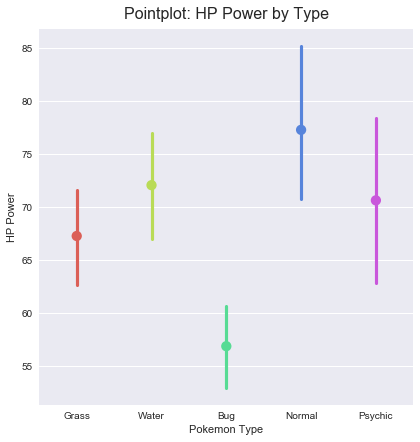

In [69]:
sns.set(style="darkgrid", palette="muted")
sns.factorplot(x='type_1', y='hp', data=df2, size=6, kind='point', palette='hls', dodge=True, join=False)
plt.xlabel("Pokemon Type")
plt.ylabel("HP Power")
plt.title('Pointplot: HP Power by Type', fontsize=16)

A pointplot represents estimate of central tendency for HP power by the position of the scatter plot points. The use of error bars around the plot points provides indication of uncertainty around this estimate. Point plots can be more useful than error bar plots for when there are more than one categorical variable. However, in this particular scenario, there is only one categorical variable. So this plot may not be the most optimal in such cases.

## Boxplot

Text(0.5,1,'Boxplot: HP Power by Type')

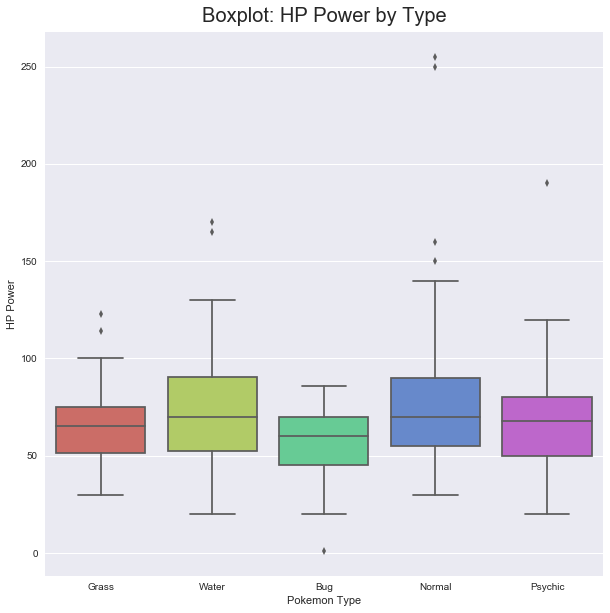

In [72]:
sns.set(style="darkgrid", palette="hls")
sns.boxplot(x="type_1", y="hp", data=df2, palette="hls")
plt.xlabel("Pokemon Type")
plt.ylabel("HP Power")
plt.title('Boxplot: HP Power by Type', fontsize=20)

This boxplot is good for showing the distribution of HP power in a comparative way across the different types of Pokemon. We get to see the spread and can identify outliers. However, in this case, it is not helpful in identifying how the datapoints are distributed at the different HP power levels.

## Letter Value Plot

Text(0.5,1,'Letter Value plot: HP Power by Type')

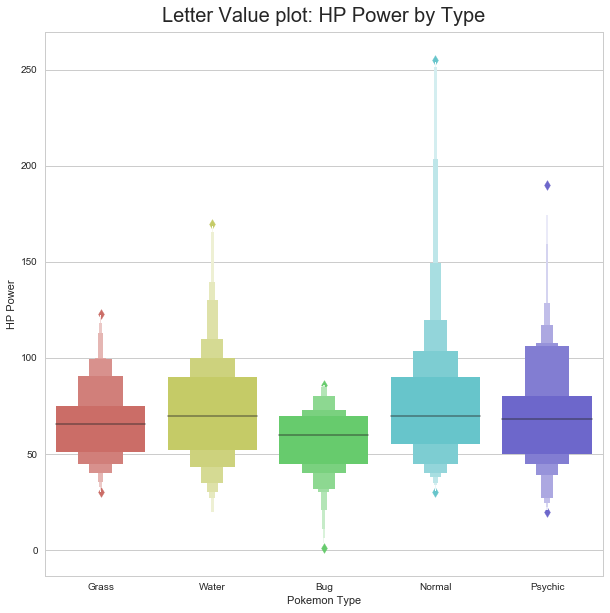

In [80]:
sns.set(style = "whitegrid", palette = "hls")
sns.lvplot(x="type_1", y="hp", data=df2)
plt.xlabel("Pokemon Type")
plt.ylabel("HP Power")
plt.title('Letter Value plot: HP Power by Type', fontsize=20)

Letter value (LV) plots are similiar to box plots as well as violin plots. LV plots are quick to generate and are easily digestible in terms of the distribution of data. However, some audiences may not be familiar with LV plots.

## Challenge

Here I will look at HP, Attack, Defense and Speed of the top 3 most common Pokemon types.

In [83]:
df3 = df2 = df[(df['type_1'] == 'Water') | (df['type_1'] == 'Normal') | (df['type_1'] == 'Grass')]
df3 = df3[['type_1', 'hp', 'defense', 'attack', 'speed']]

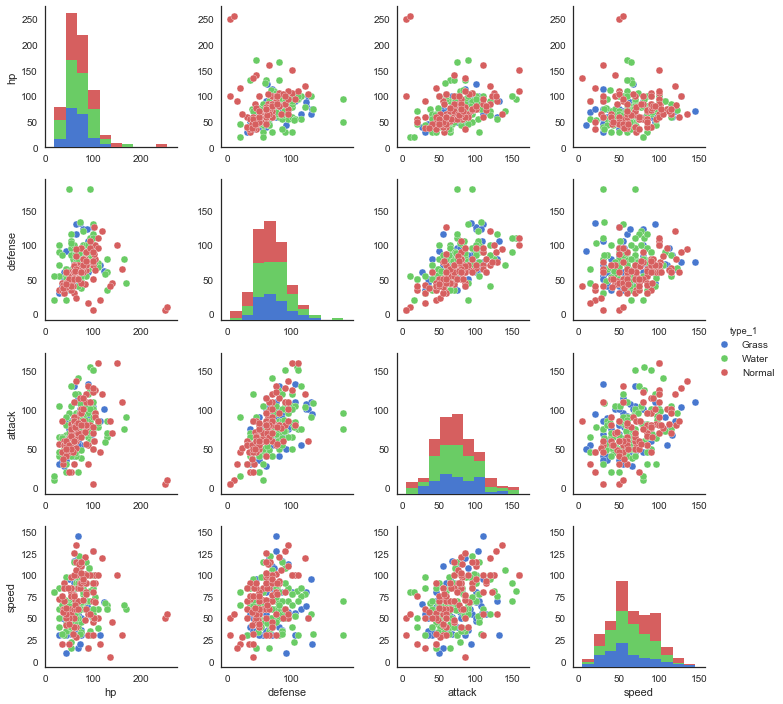

In [85]:
sns.set(style="white", palette="muted")
ax = sns.pairplot(df3, hue="type_1")